# M.Aizaz Ud Din

## The Neural Network Model


### Library

In [1]:
import mglearn
import graphviz 
import matplotlib.pyplot as plt
import numpy as np
import mglearn
import graphviz
from sklearn.model_selection import train_test_split

Text(0.5, 1.0, 'activation_functions')

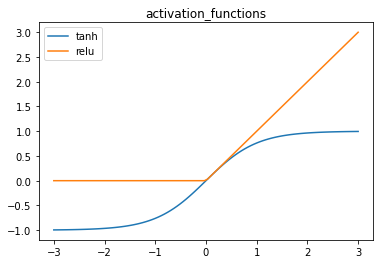

In [2]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.title("activation_functions")


In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

In [7]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

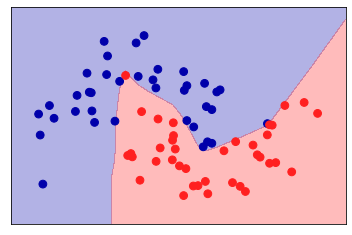

In [9]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)


D:\Install\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


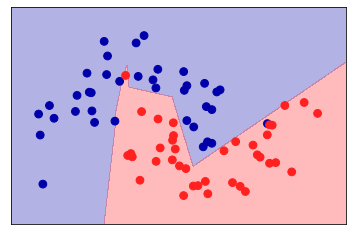

In [10]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)


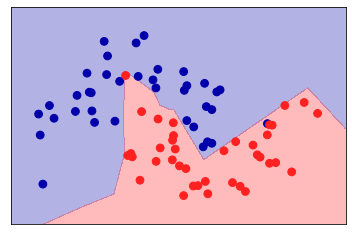

In [11]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

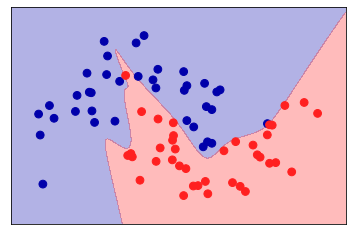

In [12]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh',random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

D:\Install\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Install\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


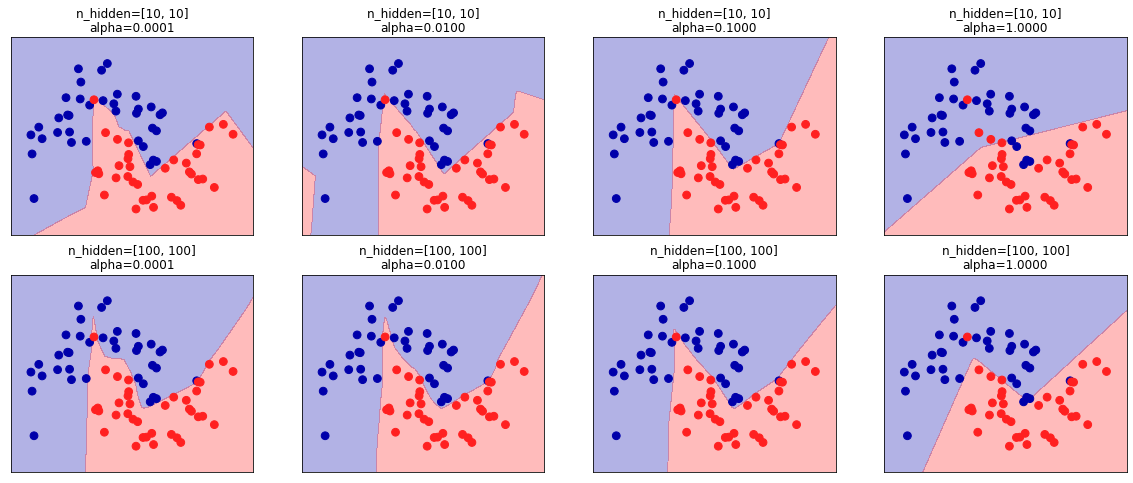

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for ax, n_hidden_nodes in zip(axes, [10, 100]):
    for axx, alpha in zip(ax, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=axx)
        axx.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)
        axx.set_title("n_hidden=[%d, %d]\nalpha=%.4f"% (n_hidden_nodes, n_hidden_nodes, alpha))


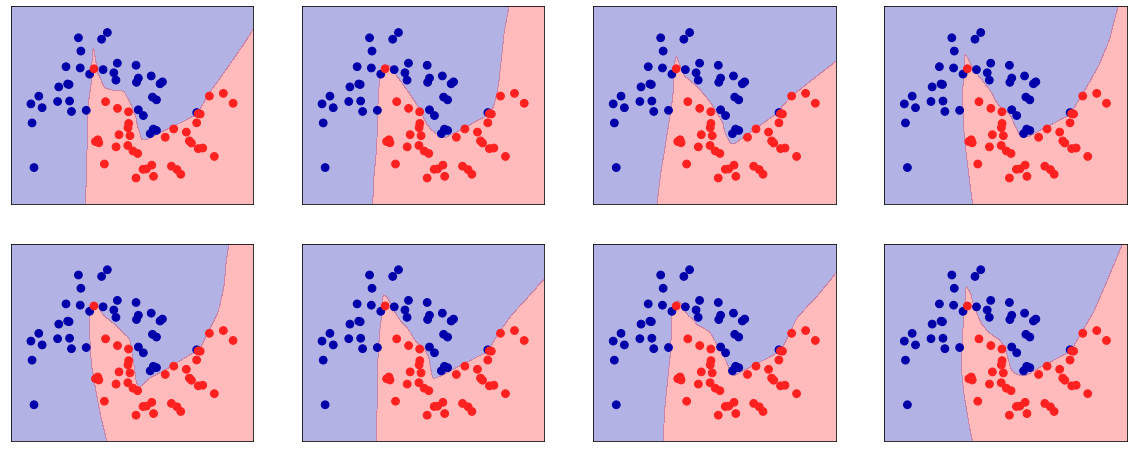

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)


### Cancer dataset

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


In [23]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)
# subtract the mean, scale by inverse standard deviation
# afterwards, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("accuracy on training set: %f" % mlp.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % mlp.score(X_test_scaled, y_test))

accuracy on training set: 0.990610
accuracy on test set: 0.965035


D:\Install\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("accuracy on training set: %f" % mlp.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % mlp.score(X_test_scaled, y_test))



accuracy on training set: 1.000000
accuracy on test set: 0.972028


In [25]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("accuracy on training set: %f" % mlp.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % mlp.score(X_test_scaled, y_test))


accuracy on training set: 0.988263
accuracy on test set: 0.972028


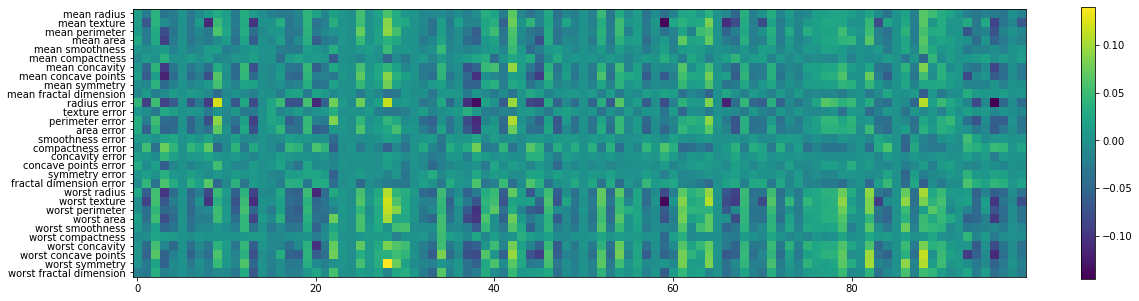

In [26]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.colorbar()


In [4]:
# create and split a synthetic dataset
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles


In [5]:
# X, y = make_blobs(centers=2, random_state=59)
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
# we rename the classes "blue" and "red" for illustration purposes:
y_named = np.array(["blue", "red"])[y]
# we can call train test split with arbitrary many arrays
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
 train_test_split(X, y_named, y, random_state=0)
# build the gradient boosting model model


In [6]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

In [8]:
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
 max_depth=3, max_features=None, max_leaf_nodes=None,
 min_samples_leaf=1, min_samples_split=2,
 min_weight_fraction_leaf=0.0, n_estimators=100, random_state=0, subsample=1.0, verbose=0,
 warm_start=False)

GradientBoostingClassifier(random_state=0)

### The Decision Function

In [9]:
print(X_test.shape)
print(gbrt.decision_function(X_test).shape)

(25, 2)
(25,)


In [10]:
print(X_test[:5])

[[ 0.13179551 -0.53591877]
 [-0.71786926  0.03192209]
 [-0.36118825 -1.4007017 ]
 [ 0.94124669 -0.01979147]
 [ 0.26516411 -0.03906867]]


In [11]:
gbrt.decision_function(X_test)[:6]

array([ 4.13592603, -1.70169917, -3.95106099, -3.62609552,  4.28986642,
        3.66166081])

In [12]:
print(gbrt.decision_function(X_test) > 0)
print(gbrt.predict(X_test))


[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [13]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]
# pred is the same as the output of gbrt.predict
np.all(pred == gbrt.predict(X_test))

True

In [14]:
decision_function = gbrt.decision_function(X_test)
np.min(decision_function), np.max(decision_function)


(-7.690971785101899, 4.289866423997604)

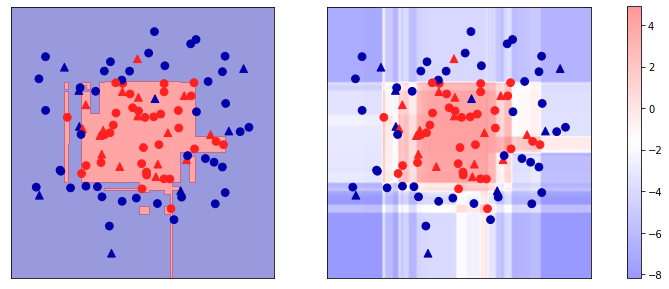

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm='bwr')
for ax in axes:
 # plot training and test points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=mglearn.cm2, s=60, marker='^')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=mglearn.cm2, s=60)
plt.colorbar(scores_image, ax=axes.tolist())

In [17]:
gbrt.predict_proba(X_test).shape

(25, 2)

In [18]:
np.set_printoptions(suppress=True, precision=3)
# show the first few entries of predict_proba
gbrt.predict_proba(X_test[:6])

array([[0.016, 0.984],
       [0.846, 0.154],
       [0.981, 0.019],
       [0.974, 0.026],
       [0.014, 0.986],
       [0.025, 0.975]])

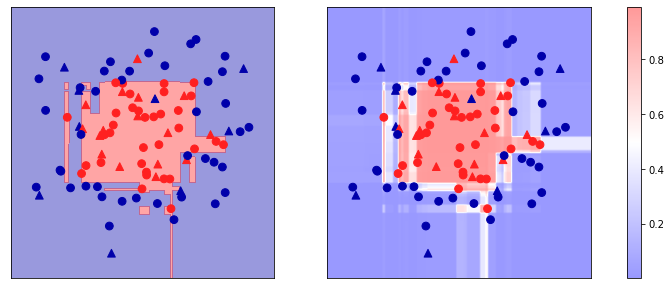

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
      mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,fill=True, cm=mglearn.cm2)
      scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4,cm='bwr', function='predict_proba')
for ax in axes:
 # plot training and test points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=mglearn.cm2, s=60, marker='^')
 ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=mglearn.cm2, s=60)
plt.colorbar(scores_image, ax=axes.tolist())

## Uncertainty in multi-class classification



In [22]:
from sklearn.datasets import load_iris
iris = load_iris()


In [23]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

In [25]:
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [26]:
GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
 max_depth=3, max_features=None, max_leaf_nodes=None,
 min_samples_leaf=1, min_samples_split=2,
 min_weight_fraction_leaf=0.0, n_estimators=100,
  random_state=0, subsample=1.0, verbose=0,
 warm_start=False)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [27]:
print(gbrt.decision_function(X_test).shape)
# plot the first few entries of the decision function
print(gbrt.decision_function(X_test)[:6, :])


(38, 3)
[[-1.996  0.048 -1.927]
 [ 0.061 -1.908 -1.928]
 [-1.991 -1.876  0.097]
 [-1.996  0.048 -1.927]
 [-1.997 -0.135 -1.203]
 [ 0.061 -1.908 -1.928]]


In [28]:
print(np.argmax(gbrt.decision_function(X_test), axis=1))
print(gbrt.predict(X_test))


[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [29]:
# show the first few entries of predict_proba
print(gbrt.predict_proba(X_test)[:6])
# show that sums across rows are one
print("sums: %s" % gbrt.predict_proba(X_test)[:6].sum(axis=1))

[[0.102 0.788 0.109]
 [0.783 0.109 0.107]
 [0.098 0.11  0.792]
 [0.102 0.788 0.109]
 [0.104 0.667 0.229]
 [0.783 0.109 0.107]]
sums: [1. 1. 1. 1. 1. 1.]


In [30]:
print(np.argmax(gbrt.decision_function(X_test), axis=1))
print(gbrt.predict(X_test))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
